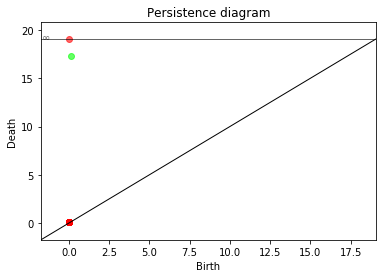

In [7]:
%matplotlib inline
import numpy as np
import gudhi as gd
import math
#construction of the grid points x, and the values therein, y = sin(x).
arg = np.linspace(0,10*math.pi,1000)
values = np.sin(arg)
#Size of the sliding window:
N = 200;
swe = []
for i in range(0,len(values)-N):
	point = []
	for j in range(0,N):
		point.append( values[i+j] );
	swe.append( point );
#Now we have the point cloud, and we can compute the persistent homology in dimension 1:


rips_complex = gd.RipsComplex(points=swe,max_edge_length=20)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()
pers = simplex_tree.persistence_intervals_in_dimension(1)
plt = gd.plot_persistence_diagram(persistence)
plt.show()

In [2]:
%matplotlib inline
import numpy as np
import gudhi as gd
import random as rd
import matplotlib
import pandas as pd
import math

data_pd = pd.read_csv('data/daily-minimum-temperatures-in-me.csv')
#We can now remove the first column:
data = data_pd.values
data = np.delete(data, (0), axis=1)

#convert it from multi dimensional array to one dimensional array:
data = data[:,0]

#in order to make the computations feasible, we should restrict the data a bit.
#experiment with various ranges, do not make it too large unless you want to restart
#your computer :)
#data = data[0:700]
#data = data[700:1500]
data = data[000:700]

values = data.astype( np.float )

#Size of the sliding window. We will try to set it close to the 
# predicted value of period, which is in this case, the number of days in a year.
N = 100;
swe = []
for i in range(0,len(values)-N):
	point = []
	for j in range(0,N):
		point.append( values[i+j] );
	swe.append( point );
#Now we have the point cloud, and we can compute the persistent homology in dimension 1:


rips_complex = gd.RipsComplex(points=swe,max_edge_length=60)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()
simplex_tree.persistence_intervals_in_dimension(1)

plt = gd.plot_persistence_diagram(persistence)
plt.show()